<a href="https://colab.research.google.com/github/ujs/open_data/blob/master/Adult_Income_UCI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

This project analyses the adult income data set obtained from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Adult). This repository is an opensource library with many cool data sets. I selected this data set because I was interested in exploring whether or not there are any clear patterns of income inequality in the data. The dataset contains thirteen input variables (aka features) that are a mixture of categorical, ordinal and numerical data types. The output label in this dataset is income levels (either >50K or <= 50K). This is a binary classification problem. The complete list of input variables is as follows: *Age, Workclass, Education, Education Number of Years, Marital-status, Occupation, Relationship, Race, Sex, Capital-gain, Capital-loss, Hours-per-week, Native-country*
In the project I will analyse the data and perform supervised and unsupervised machine learning techniques to predict income levels based on input features.








In [1]:
#Importing libraries for data analysis & machine learning
import pandas as pd
import numpy as np
import math
import statsmodels as sm
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
import fancyimpute
import missingno as mn
from sklearn import decomposition, preprocessing, cluster, tree
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
import pydotplus
from scipy.cluster import hierarchy


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**Data Exploration**

The first step is to load the data into a pandas dataframe and perform some basic exploration. In this section I explore some fundamental aspects of the dataframe like its data types, schema, missing values, featurewise value counts etc.

In [2]:
COLUMNS = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income']
original_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=COLUMNS, sep=r'\s*,\s*', engine='python', na_values="?")
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Looking at the data types of columns
original_data.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours per week     int64
Country           object
Income            object
dtype: object

In [4]:
#Investigating missing values
original_data.isna().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Income               0
dtype: int64

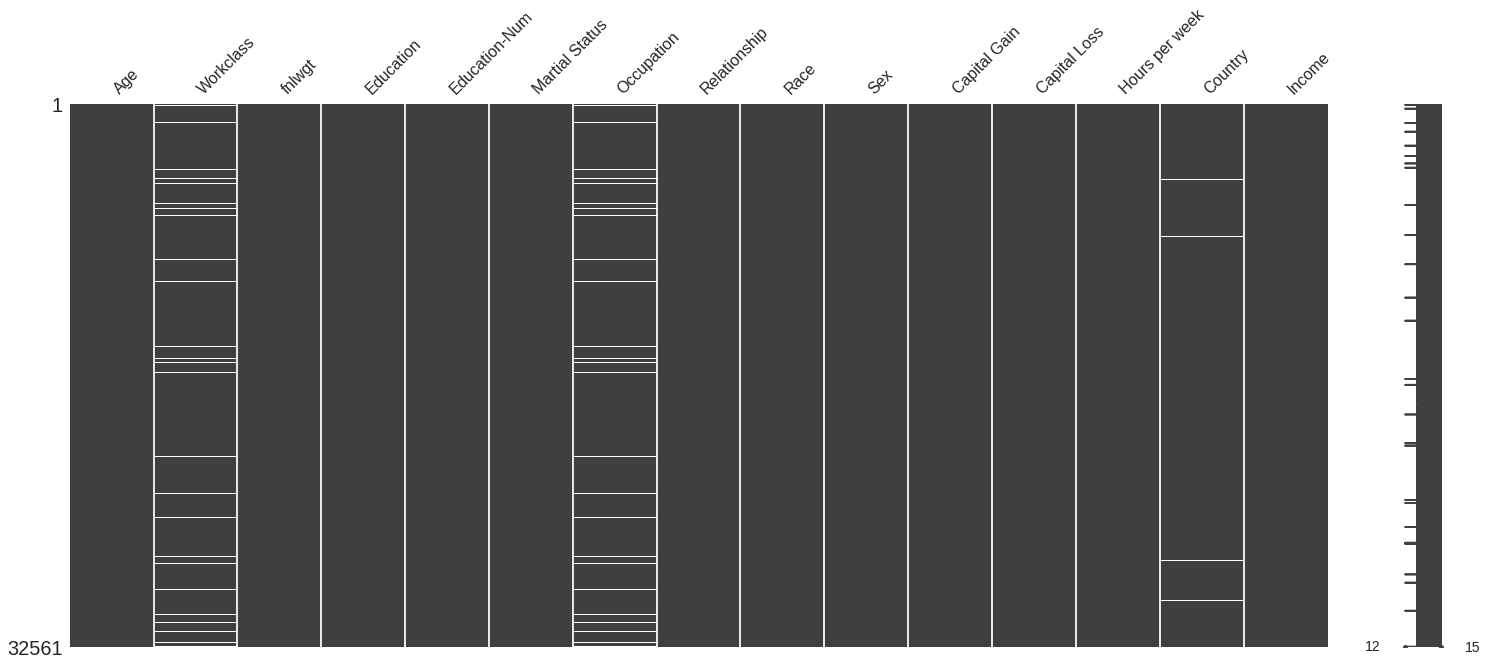

In [5]:
mn.matrix(original_data)

In [6]:
#Looking at missing values as percentage of overall data
original_data.isna().mean() *100

Age               0.000000
Workclass         5.638647
fnlwgt            0.000000
Education         0.000000
Education-Num     0.000000
Martial Status    0.000000
Occupation        5.660146
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital Gain      0.000000
Capital Loss      0.000000
Hours per week    0.000000
Country           1.790486
Income            0.000000
dtype: float64

Looks like less than 6% of values in 3 columns (Workclass, Occupation and Country) are missing.

In [0]:
original_data.Workclass.value_counts(dropna = False)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [0]:
original_data.Workclass.value_counts(normalize=True, dropna = False)

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
NaN                 0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

In [0]:
original_data.Occupation.value_counts(dropna = False)

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
NaN                  1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [0]:
original_data.Occupation.value_counts(normalize=True, dropna = False)

Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
NaN                  0.056601
Transport-moving     0.049046
Handlers-cleaners    0.042075
Farming-fishing      0.030527
Tech-support         0.028500
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
Name: Occupation, dtype: float64

In [0]:
original_data.Country.value_counts(dropna = False)

United-States                 29170
Mexico                          643
NaN                             583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [0]:
original_data.Education.value_counts(dropna = False)

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

In [0]:
original_data['Relationship'].value_counts(dropna = False)

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: Relationship, dtype: int64

In [0]:
original_data['Race'].value_counts(dropna = False)

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [0]:
original_data['Sex'].value_counts(dropna = False)

Male      21790
Female    10771
Name: Sex, dtype: int64

In [0]:
original_data['Income'].value_counts(dropna = False)

<=50K    24720
>50K      7841
Name: Income, dtype: int64

Incomes look skewed to the right. Let's look at the distribution of capital gains and losses as well.

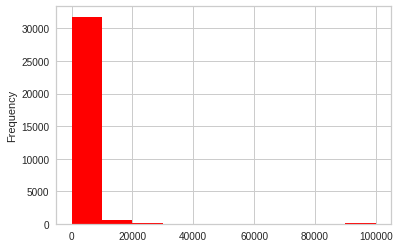

In [0]:
# Check Capital/Gains Distribution

original_data['Capital Gain'].plot.hist(color = 'Red')

Capital gain and loss distributions are highly skewed towards the right and follow a power law distribution such that >90% adults have zero capital gains or capital losses. I will transform these features before training the machine learning algorithm but will leave these features for EDA.

In [0]:
original_data['Capital Gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64

In [0]:
original_data['Capital Loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital Loss, dtype: float64

In [0]:
print('Capital Gain 91st percentile: ',original_data['Capital Gain'].quantile(.91))
print('Capital Loss 95th percentile: ', original_data['Capital Loss'].quantile(.95))

Capital Gain 91st percentile:  0.0
Capital Loss 95th percentile:  0.0


In [0]:
# Data Clean Up for further visualizations and EDA

def clean_data(df):

  #Correcting spelling error in dataframe column 'Martial Status'
  df.rename(columns = {'Martial Status':'Marital Status'}, inplace = True)
  
  #Handling Missing Values
  print("Shape of dataframe BEFORE handling missing values: ", df.shape)
    # Drop all observations with missing values in columns 'Country, 'Occupation'
  df.dropna(subset = ['Country', 'Occupation'], inplace = True)
    # Replace missing values in 'Workclass' column with the mode
  df.Workclass.fillna(df.Workclass.mode()[0], inplace = True)
  print("Shape of dataframe AFTER handling missing values: ", df.shape)


  # Regroup countries into 2 geographical regions (US and non US) since US is overwhelming majority
  df['native_region'] = df.Country.apply(lambda country:'US' if country in ["Outlying-US(Guam-USVI-etc)","United-States" ] 
                                         else 'non-US')
  
  #Regroup 'Marital-Status'
  df['Marital Status'] = df['Marital Status'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'],'Single')
  df['Marital Status'] = df['Marital Status'].replace(['Married-AF-spouse','Married-civ-spouse'],'Couple')


  #Drop 'Education' and 'Country'
  df.drop(['Education', 'Country'], axis = 1, inplace=True)

  return df


df = clean_data(original_data)

df.head()


Shape of dataframe BEFORE handling missing values:  (32561, 15)
Shape of dataframe AFTER handling missing values:  (30162, 15)


,Age,Workclass,fnlwgt,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Income,native_region
0,39,State-gov,77516,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,US
1,50,Self-emp-not-inc,83311,13,Couple,Exec-managerial,Husband,White,Male,0,0,13,<=50K,US
2,38,Private,215646,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,US
3,53,Private,234721,7,Couple,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,US
4,28,Private,338409,13,Couple,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,non-US


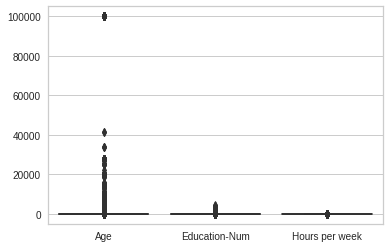

In [0]:
#Plots
fig, axis = plt.subplots()
ax1 = sns.boxplot(data = df[['Capital Gain', 'Capital Loss']])
ax2 = sns.boxplot(data = df[['Age','Education-Num','Hours per week']])


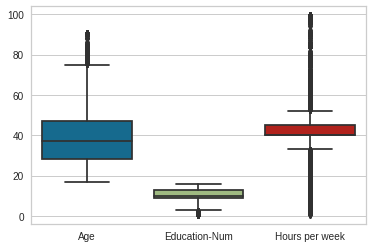

In [0]:
#Outliers
sns.boxplot(data = df[['Age','Education-Num','Hours per week']])


In [0]:
df.Age.quantile([.9,.99])

0.90    57.0
0.99    72.0
Name: Age, dtype: float64

In [0]:
#Numerical Variables
numeric_var = df.select_dtypes(include=['int','float']).columns
nvar = len(numeric_var)
print (numeric_var)


Index(['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week'],
      dtype='object')


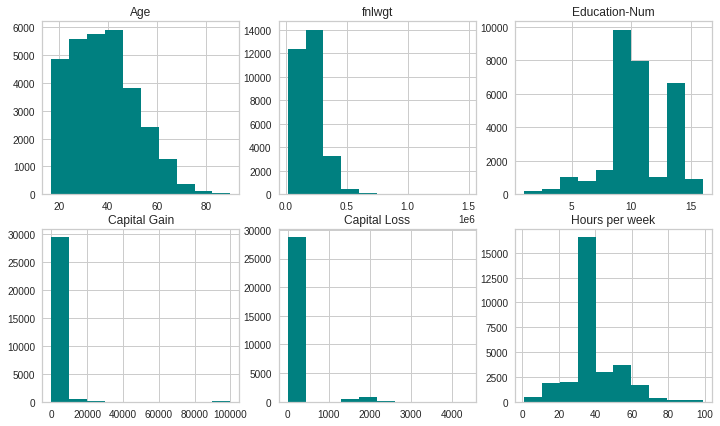

In [0]:
# Plotting histograms for numerical features
fig = plt.figure(figsize=(12,7))
ncols = 3
nrows = math.ceil(nvar/ncols)

for i,column in enumerate(['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss','Hours per week']):
  ax = fig.add_subplot(nrows, ncols, i + 1)
  ax.set_title(column)
  df[column].hist(axes = ax, color = 'teal')

In [0]:
# Non numerical Variables
cat_var = df.select_dtypes(exclude=['int','float']).columns
n_cat_var = len(cat_var)
print(cat_var)

Index(['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Income', 'native_region'],
      dtype='object')


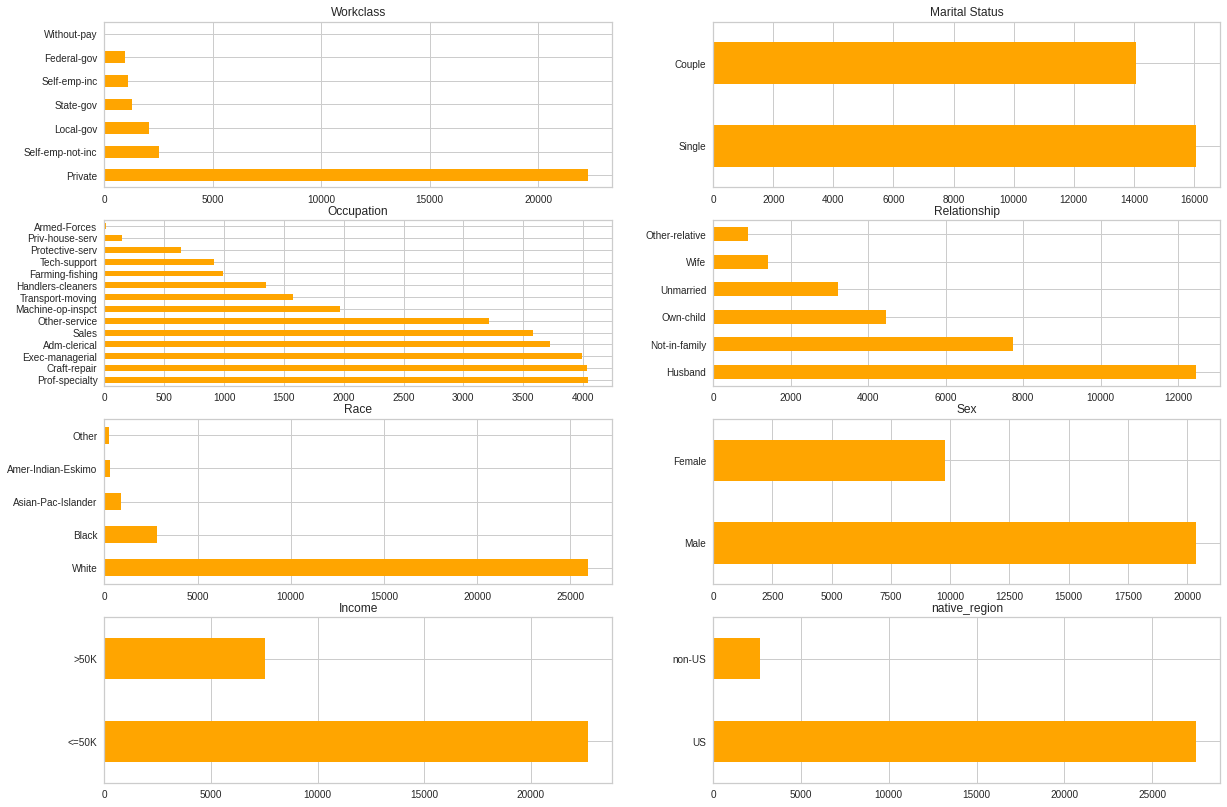

In [0]:
# Plotting bar charts for categorical features
fig = plt.figure(figsize=(20,14))
ncols = 2
nrows = math.ceil(n_cat_var/ncols)

for i,column in enumerate(['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race',
                           'Sex', 'Income', 'native_region']):
  ax = fig.add_subplot(nrows, ncols, i + 1)
  ax.set_title(column)
  df[column].value_counts().plot.barh(axes = ax, color = 'orange')

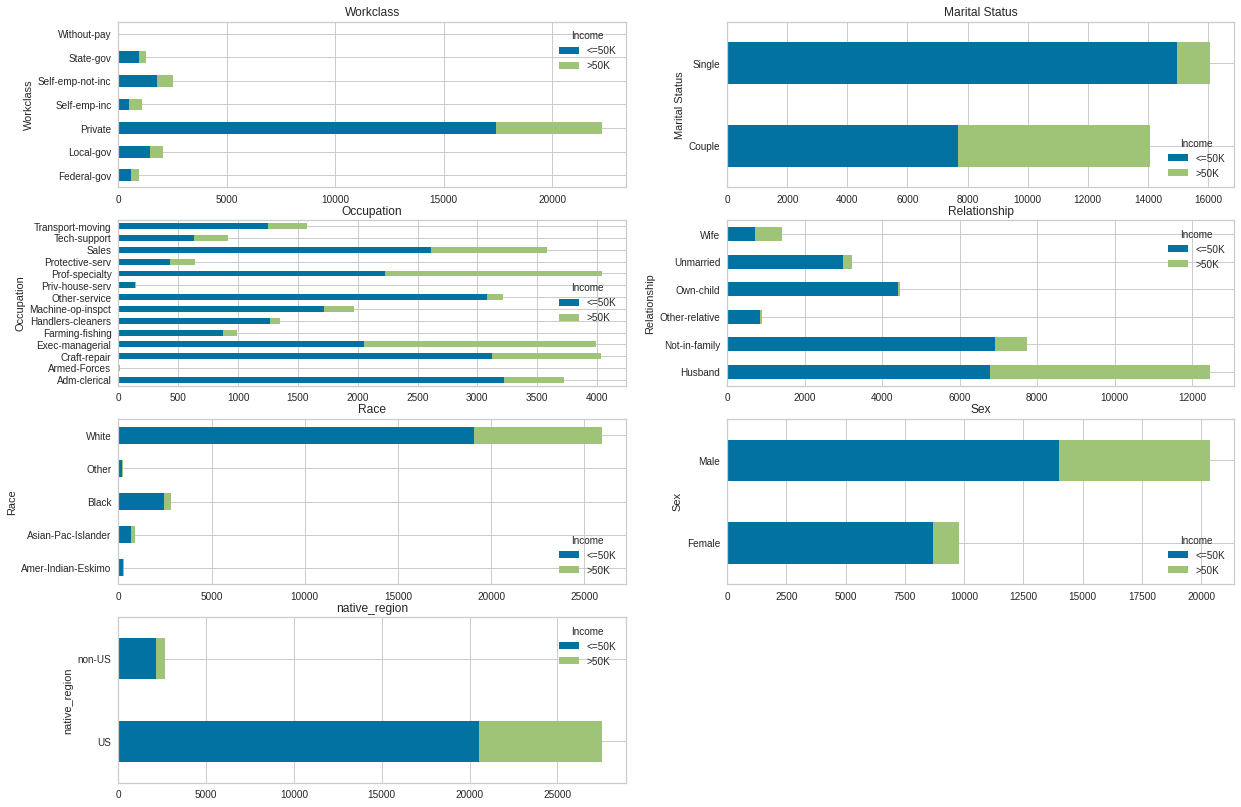

In [0]:
# Plotting bar charts for categorical features
fig = plt.figure(figsize=(20,14))
ncols = 2
nrows = math.ceil(n_cat_var/ncols)

for i,column in enumerate(['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race',
                           'Sex', 'native_region']):
  ax = fig.add_subplot(nrows, ncols, i + 1)
  ax.set_title(column)
  df.pipe(lambda df2: pd.crosstab(df2[column], df2.Income)).plot.barh(stacked = True, ax = ax)


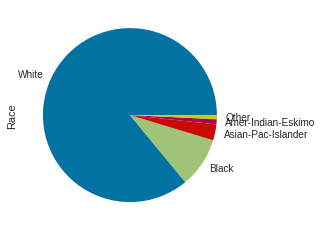

In [0]:
df.Race.value_counts().plot(kind = 'pie') 

In [0]:
pd.pivot_table(data = df, values = 'Hours per week', index = 'Race', aggfunc = 'sum')

,Hours per week
Race,
Amer-Indian-Eskimo,11562
Asian-Pac-Islander,36248
Black,108946
Other,9266
White,1068546


In [0]:
df.groupby('Sex')['Hours per week'].describe()


,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,9782.0,36.932222,11.429769,1.0,33.0,40.0,40.0,99.0
Male,20380.0,42.850687,11.762157,1.0,40.0,40.0,50.0,99.0


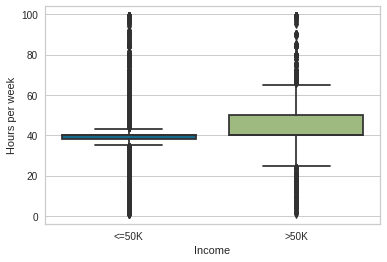

In [0]:
sns.boxplot(x = 'Income' , y = 'Hours per week' , data = df)

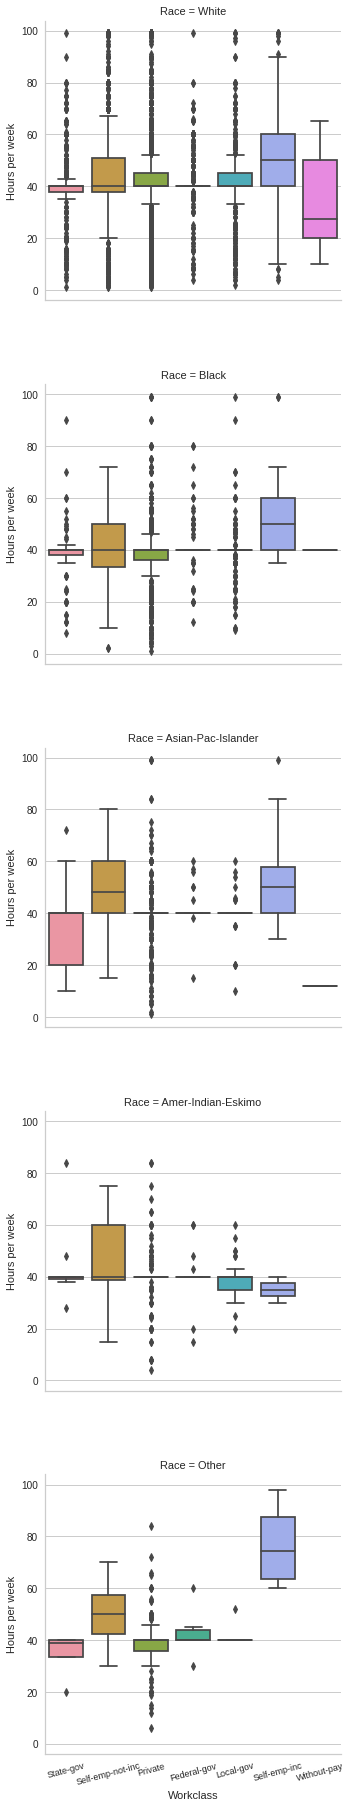

In [0]:
ax = sns.catplot(x='Workclass', y='Hours per week', kind ='box', data=df, col='Race', col_wrap=1)
ax.set_xticklabels(fontsize=9, rotation = 15)
plt.subplots_adjust(hspace = 0.3)


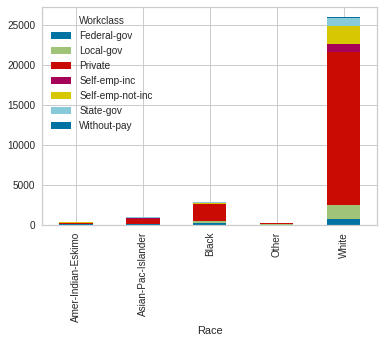

In [0]:
(df
 .pipe(lambda df2: pd.crosstab(df2.Race, df2.Workclass))
 .plot.bar(stacked=True)
)

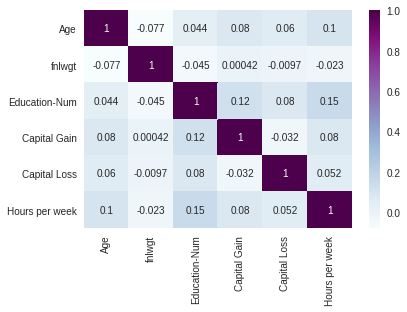

In [0]:
#Correlation Matrix
#df.Income = LabelEncoder().fit_transform(df.Income)
#plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df.corr(), annot = True, cmap="BuPu")

In [0]:
#Average Capital Gains by Occupation
pd.pivot_table(df, values = 'Capital Gain', index = 'Occupation', aggfunc = 'mean')

,Capital Gain
Occupation,
Adm-clerical,497.097286
Armed-Forces,0.000000
Craft-repair,657.586849
Exec-managerial,2185.330912
Farming-fishing,592.707786
Handlers-cleaners,258.140000
Machine-op-inspct,323.825025
Other-service,181.705479
Priv-house-serv,291.594406


In [0]:
#Average Capital Gains by Workclass
pd.pivot_table(df, values = 'Capital Gain', index = 'Workclass', aggfunc = 'mean')

,Capital Gain
Workclass,
Federal-gov,832.321315
Local-gov,829.230285
Private,879.858207
Self-emp-inc,4810.746741
Self-emp-not-inc,1913.134454
State-gov,684.306489
Without-pay,487.857143


In [0]:
#Capital Gains by Race
df.groupby('Race')[['Capital Gain']].describe()

Capital Gain                            ...                   
                          count         mean          std  ...  50%  75%      max
Race                                                       ...                   
Amer-Indian-Eskimo        286.0   660.290210  2858.653413  ...  0.0  0.0  27828.0
Asian-Pac-Islander        895.0  1304.375419  9071.621271  ...  0.0  0.0  99999.0
Black                    2817.0   604.722045  5015.170641  ...  0.0  0.0  99999.0
Other                     231.0  1060.653680  9325.859912  ...  0.0  0.0  99999.0
White                   25933.0  1142.651024  7572.187948  ...  0.0  0.0  99999.0

[5 rows x 8 columns]

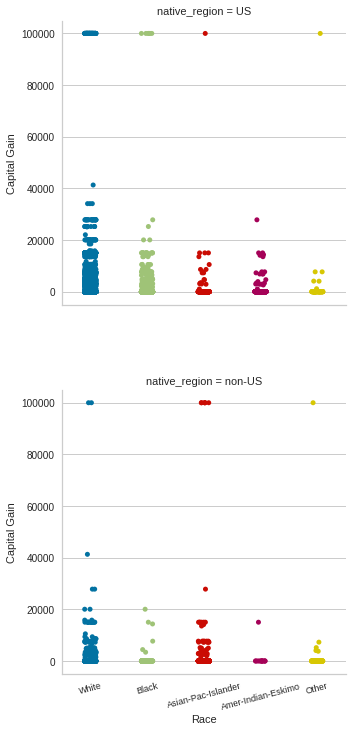

In [0]:
ax = sns.catplot(x='Race', y='Capital Gain', data=df, col='native_region', col_wrap=1)
ax.set_xticklabels(fontsize=9, rotation = 15)
plt.subplots_adjust(hspace = 0.3)

Next, I visualize the distributions of each of the features in the form of a histogram or barchart to see which direction are the features skewed in. By eyeballing the histograms, the viewer can get a sense of statistics like the most likely educational level of working adults, most common occupation, median age, salary distribution etc.

I also like to use heat maps and correlation matrices for visualization. Heatmaps are very intuitive visual aids and help in quickly identifying attributes that are highly correlated to each other. For instance, in the heatmap below, education level, and age display a higher correlation to income. This stands out pretty clearly.

Now since, we see education as one of the most important features, we can zoom into this and plot more graphs like a more specific barchart to visualize how education impacts income.

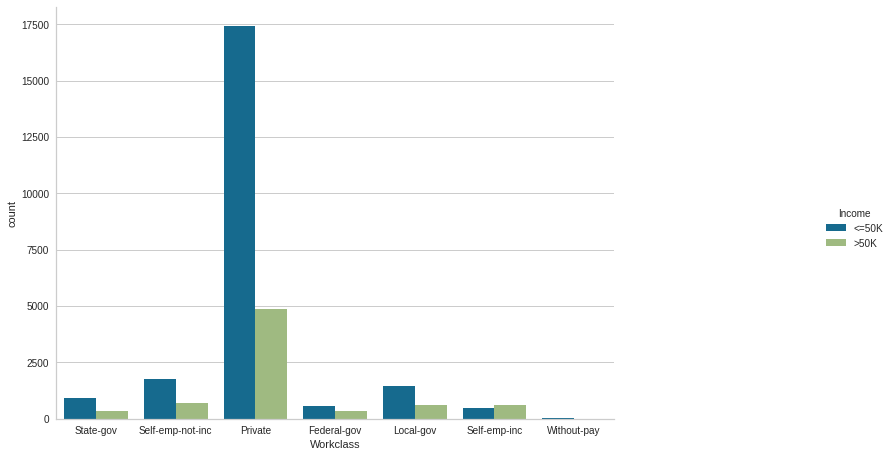

In [0]:

sns.catplot(x="Workclass", hue="Income", data=df, kind="count", height=4, aspect=.7)
plt.gcf().set_size_inches(15,7)

Income levels are also linked to race. So a plot to visualize that will be helpful.

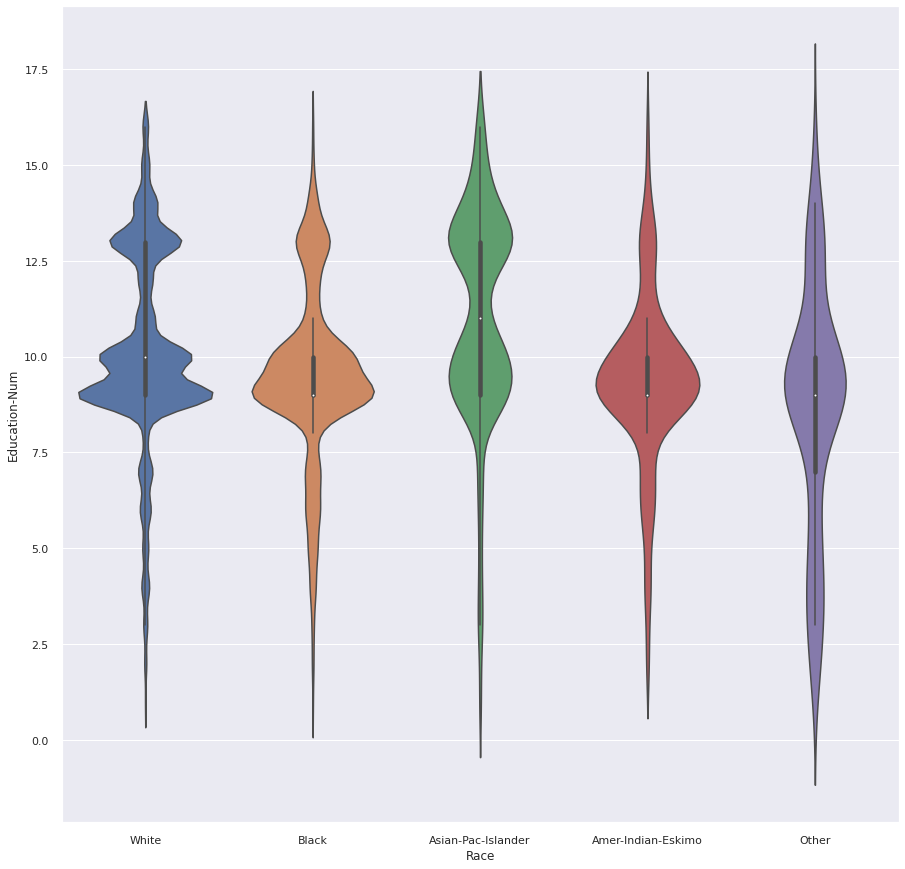

In [0]:
#  Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot shows how education varies with race

plt.subplot(1,1,1)
sns.violinplot(x = original_data['Race'], y = original_data['Education-Num'], data = original_data);

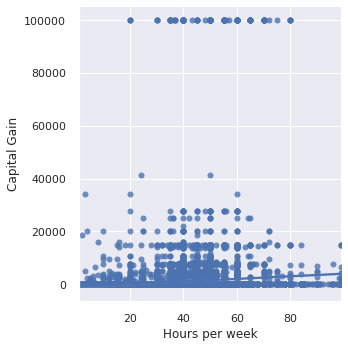

In [0]:
sns.lmplot(x = 'Hours per week' , y= 'Capital Gain', data = df)

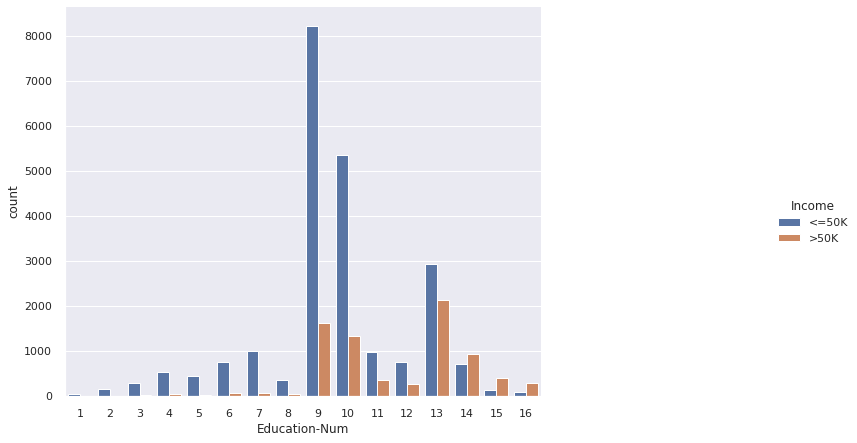

In [0]:


sns.catplot(x='Education-Num', hue="Income", data=df, kind="count", height=4, aspect=.7)
plt.gcf().set_size_inches(15,7)

In [0]:
#Capital Gain non zero value distriution

df['Capital Gain'][df['Capital Gain']!=0].describe()

count     2538.000000
mean     12977.596927
std      22311.914505
min        114.000000
25%       3464.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: Capital Gain, dtype: float64

In [0]:
#Capital Gain non zero value distriution

df['Capital Loss'][df['Capital Loss']!=0].describe()

count    1427.000000
mean     1867.898388
std       361.857358
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: Capital Loss, dtype: float64

#### **Supervised Machine Learning**

In [0]:
#Functions to define Logistic regression & Decision Tree based Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
def get_models():
  models, names = list(), list()
  #LR (Logistic Regression) 
  models.append(LogisticRegression())
  names.append('LR')
  # RF (Random Forests)
  models.append(RandomForestClassifier(n_estimators=100))
  names.append('RF')
	# GB (Gradient Boosting)
  models.append(GradientBoostingClassifier(n_estimators=100))
  names.append('GB')
  # XG Boosting
  models.append(XGBClassifier(n_estimators=100))
  names.append('XGB')
  return models, names  

In [0]:
#Data Transformation before Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
def data_transform(df):
  #Handle Capital Gains and Capital Loss Columns
  #df['Capital Gain'] = df['Capital Gain'].apply(lambda gain:'zero' if gain == 0 else ('low' if gain <= 7298 else 'high'))
  #df['Capital Loss'] = df['Capital Loss'].apply(lambda loss:'zero' if loss == 0 else ('low' if loss <= 1887 else 'high'))

  #Handle Categorical data & Normalize data 
  num_data = pd.get_dummies(df)
  X = num_data[num_data.columns[:-4]]
  std = preprocessing.StandardScaler()
  X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
  Y = pd.Series(LabelEncoder().fit_transform(df.Income))
  #Splitting data into train and test sets
  X_std_train, X_std_test, Y_train, Y_test  = train_test_split(X_std, Y, test_size=0.25)
  return X_std_train, X_std_test, Y_train, Y_test

X_std_train, X_std_test, Y_train, Y_test = data_transform(df)
Y_train.head()


29449    1
1747     0
5605     1
18396    0
5277     0
dtype: int64

In [0]:
#Funtion that inputs data, model and peforms k fold cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def evaluate_model(X_std_train, Y_train, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X_std_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

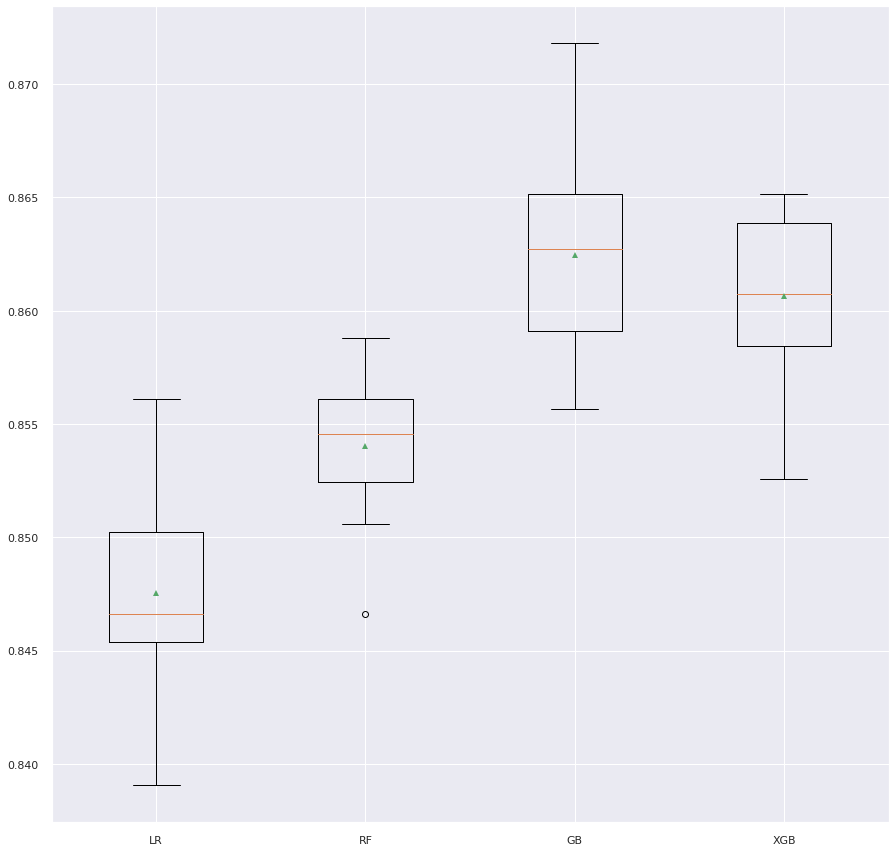

In [0]:
models, names = get_models()
results = list()
for i in range(len(models)):

	# evaluate the model and store results
	scores = evaluate_model(X_std_train, Y_train, models[i])
	results.append(scores)

# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [0]:
#Checking Prediction Accuracy on Test Data
from sklearn.metrics import accuracy_score
best_model = models[3]
best_model.fit(X_std_train, Y_train)
prediction = best_model.predict(X_std_test)
acc_score = accuracy_score(Y_test,prediction) 


In [0]:
print('Accuracy of predictions on test data is: ', acc_score)

Accuracy of predictions on test data is:  0.864739424479512


### Unsupervised Machine **Learning**

In [0]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std_train), columns=[f'PC{i+1}' for i in range(len(X_std_train.columns))])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,2.743430,2.152590,0.399530,1.647278,1.597814,2.570986,-3.204442,0.245490,-3.072857,0.876266,0.005890,-2.155289,0.153932,1.202449,1.937893,1.264511,-0.502618,0.507010,0.023206,-2.305650,1.279510,-0.263776,-0.791206,1.206627,0.477834,0.422781,0.105454,0.126382,0.622119,0.511720,-0.605412,1.925672,-0.047122,0.044438,-0.894139,-0.015268,6.919197e-14,-6.377434e-15,3.800583e-15,-8.082610e-16,7.642595e-16,-2.065205e-15
1,-0.865083,-0.406186,-1.722622,0.843770,-0.990720,2.466663,0.816736,-0.889995,0.345125,-0.448504,0.835587,1.225278,-0.341344,0.480121,0.115294,0.152277,-0.267061,-0.739523,-0.149816,0.044945,-0.748278,0.150164,0.517470,-0.006815,-0.641268,0.172881,0.887617,-0.707594,0.267893,-0.137788,-0.252627,0.655053,-0.344414,1.138538,0.739599,-0.008438,3.205982e-15,8.435860e-17,-1.741528e-15,1.473579e-15,7.250615e-17,-1.004104e-16
2,2.546193,2.456199,-0.588581,0.767340,-0.165218,2.721654,-1.049566,-1.676012,-0.713021,-0.111627,0.279674,-0.525119,-0.237303,1.400825,0.584254,0.034978,-2.752649,0.274265,-0.113871,0.944893,-2.287377,-0.263097,0.452183,-0.955843,2.448914,0.307150,0.330657,-0.300991,-0.267277,-0.369288,0.638207,-1.661468,0.853806,-0.990263,0.673224,-0.009482,-7.744057e-16,3.778106e-15,-5.100295e-15,-1.208904e-15,1.366539e-15,-1.578911e-16
3,2.680511,-0.967645,0.193029,-0.645445,-0.551033,-0.379621,-1.142680,-0.125074,-0.484128,0.810950,0.468960,-0.662623,-3.006460,0.389516,-1.711442,-0.767099,-1.534344,0.977951,-0.830921,0.932855,-2.848407,0.203436,0.942089,-1.072433,3.147991,0.934568,-0.605017,-0.041166,1.239001,0.398787,-0.149237,-0.037703,-0.055005,-0.509019,-0.364530,-0.006020,8.042326e-15,2.086253e-15,2.963634e-15,1.756137e-16,-5.436213e-16,-3.636026e-17
4,1.921088,-2.235408,0.823278,-1.006849,-0.073340,-0.634299,-1.160629,-0.295629,-0.424388,1.361759,1.133433,0.485879,0.864119,-1.463724,1.707533,-0.028256,0.168857,-1.386823,0.169215,-0.054587,-0.419874,-0.755467,0.768727,-0.248780,-0.183255,-0.155351,-0.472600,0.657165,0.233177,-0.779843,0.240144,-0.474322,-0.244090,-0.420818,0.751701,-0.022583,1.909357e-15,3.383412e-15,-1.816070e-15,1.331524e-15,-1.242119e-16,1.606293e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22616,-2.968260,-0.245850,3.444518,0.576531,-0.361770,-1.222285,-0.406592,0.048601,-0.534603,-2.933628,0.192153,0.680163,1.177295,-0.081285,-0.583041,1.214222,-0.459688,0.386511,-0.371960,0.222953,-0.111388,0.810871,0.938708,-0.364283,-0.766556,-0.175886,0.122824,-0.793624,1.025877,0.546304,-0.189868,-0.057912,0.249488,-1.037661,-0.336269,0.011198,3.019500e-16,-1.821170e-16,-1.749383e-16,-4.977012e-17,3.306332e-17,-6.019474e-18
22617,-1.818201,2.669112,-1.399562,0.895801,0.096775,-0.422198,-0.404529,1.157634,0.136026,1.513358,-1.949860,0.705663,-0.774370,-2.894901,0.087974,0.788866,0.850792,0.780107,-1.354876,1.319534,1.007476,0.725125,0.042648,0.696398,-0.505443,0.534774,-0.410564,-0.471152,0.439815,0.372712,0.374886,-1.654543,-0.887933,-0.776683,0.384042,-0.003980,-8.933202e-16,-4.791139e-16,-1.364630e-16,-1.188954e-16,2.840343e-17,-8.565961e-17
22618,2.602727,1.981232,-0.097798,0.454567,-0.146955,0.310247,0.074716,3.706524,2.028001,0.742546,-0.880949,0.665669,0.216943,0.814940,0.181526,-1.435251,-1.337781,-1.576371,1.732147,-0.070413,-0.472382,-0.369385,-0.238042,1.598476,-1.053162,1.194258,0.185706,-0.500664,0.703566,0.522393,-1.173975,-0.937948,0.426658,-0.589604,-0.508442,-0.007677,8.362722e-16,1.475073e-16,-2.320205e-16,1.804807e-16,1.141692e-17,-3.197126e-17
22619,2.520353,-1.718140,0.948588,-0.811477,0.756597,-1.541918,-1.848193,0.091812,-0.841027,0.697518,0.499494,-0.167929,-2.766107,0.391664,-1.654650,-1.275142,1.406641,0.283548,-0.017544,0.102090,-0.641561,-0.2453

In [0]:
pca.explained_variance_ratio_[:]

array([1.14306120e-01, 5.71170003e-02, 4.77735925e-02, 4.37149369e-02,
       3.75434260e-02, 3.62144208e-02, 3.23382624e-02, 2.97897556e-02,
       2.91774041e-02, 2.76223563e-02, 2.74899915e-02, 2.68398613e-02,
       2.64725313e-02, 2.61123958e-02, 2.59324160e-02, 2.53246912e-02,
       2.52215621e-02, 2.50415639e-02, 2.47071997e-02, 2.41419997e-02,
       2.40158474e-02, 2.34047594e-02, 2.27290249e-02, 2.25172075e-02,
       2.18912560e-02, 2.16123981e-02, 2.13283206e-02, 2.07488902e-02,
       2.00179919e-02, 1.77820746e-02, 1.72728133e-02, 1.64776769e-02,
       1.36657164e-02, 1.26631042e-02, 1.04336975e-02, 5.57734059e-04,
       2.25429073e-32, 3.58636064e-33, 3.06753753e-33, 1.81477438e-33,
       4.71808404e-34, 1.08785253e-34])

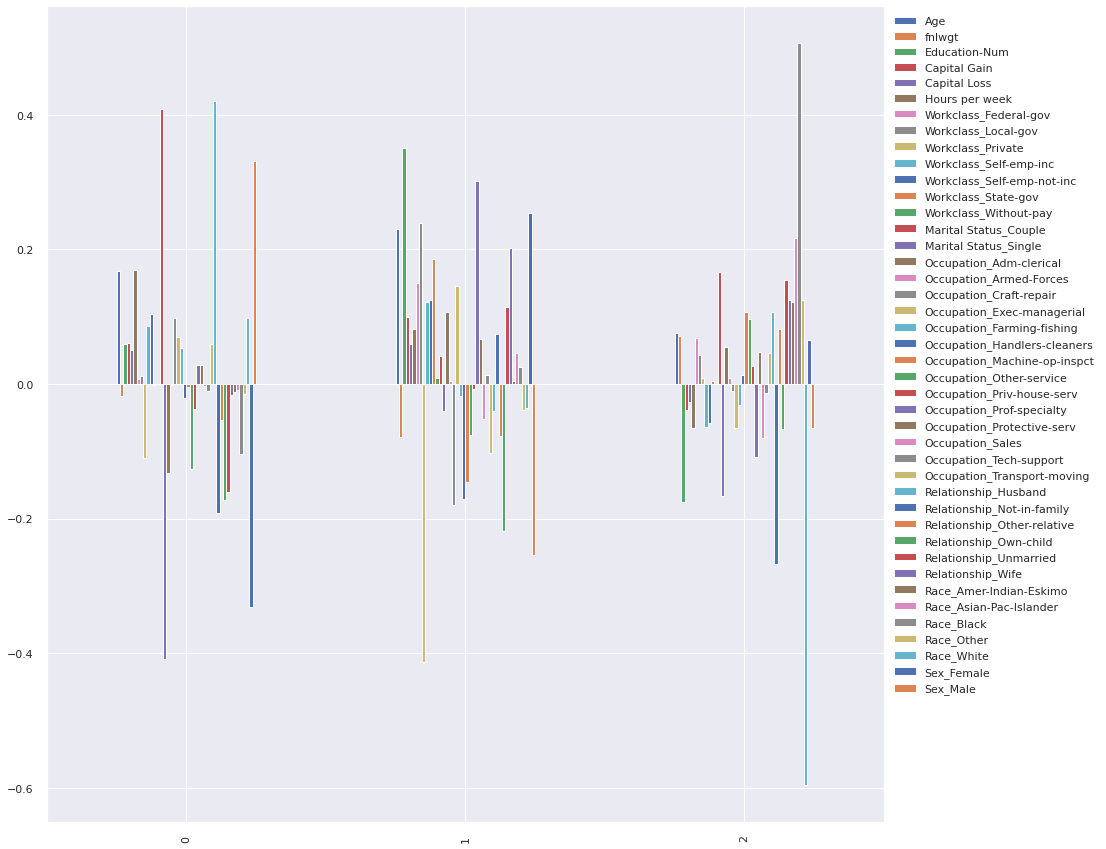

In [0]:
(pd.DataFrame(pca.components_, columns=X_std_train.columns)
 .iloc[:3]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

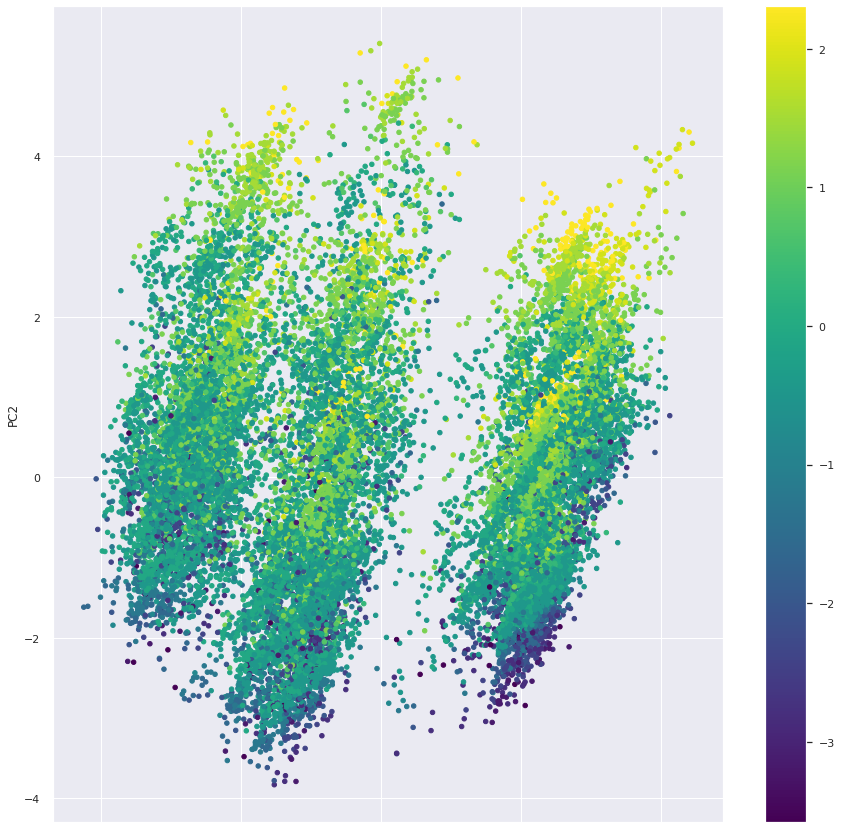

In [0]:
# Plot with Seaborn
pca_X.plot.scatter(x='PC1', y='PC2', c = X_std_train['Education-Num'], cmap = 'viridis')

In [0]:
agg = cluster.AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
agg.fit(X_std_train)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [0]:
agg.labels_

array([0, 0, 1, ..., 0, 1, 0])

In [0]:
#X.assign(label = agg.labels_).groupby('label').agg(['mean', 'std'])

NameError: ignored

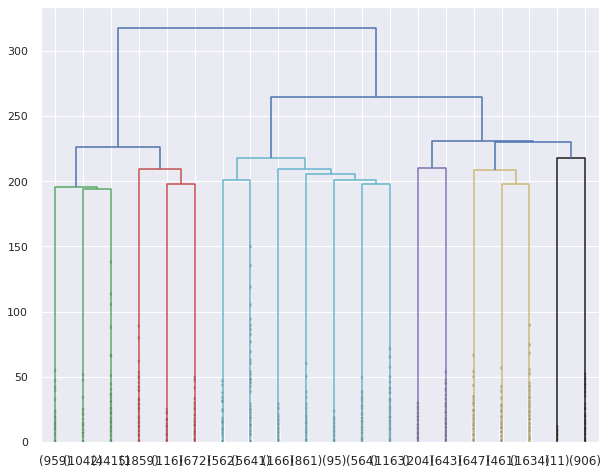

In [0]:
fig, ax = plt.subplots(figsize=(10,8))
hierarchy.dendrogram(hierarchy.linkage(X_std_train, method='ward'),truncate_mode='lastp', p=20, show_contracted=True)

pass

**Summary and Conclusion**